<h1 align="center"> Score de densité médicale </h1> 

<h3 align="center">Kenza Elass et Rebecca Clain</h3> 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None) 
import ipywidgets as widgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('analyse_df.csv', sep = ';', low_memory = False)

df.columns = ['code commune établissement', 'ambulance', 'analyse médicale', 'autre', 'autre spécialiste',
              'chirurgien','dentiste', 'generaliste', 'hopital', 'infirmiers', 'organe', 'radiologiste',
              'réeducateur podologue', 'code géographique', 'libellé géographique','nombre ménage fiscaux',
              'nombre personne ménage fiscaux', 'médiane niveau de vie', 'part ménages fiscaux imposés',
              'taux de pauvreté ensemble', 'taux de pauvreté moins de 30 ans', 'taux de pauvreté 30 à 39 ans',
              'taux de pauvreté 40 à 49 ans', 'taux de pauvreté 50 à 59 ans', 'Taux de pauvreté 60 à 74 ans',
              'taux de pauvreté 75 ans ou plus','taux de pauvreté propriétaires','taux de pauvreté locataires',
              'part des revenus activités','dont part des salaires et traitement hors chomage',
              'dont part des indemnites de chomage', 'dont part des revenus des activites non salaries',
              'part des pensions retraites et rentes','part des revenus du patrimoine et autres revenus',
              'part ensemble prestations sociales','dont part prestations familiales', 'dont part des minima sociaux',
              'dont part des prestations logement','part des impots','1er décile niveau de vie',
              '9e décile niveau de vie','rapport interdecile 9e/1er','merge_']

In [3]:
def missing_values_table(df) :
        
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending = False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        
        return mis_val_table_ren_columns
    
missing_values_table(df)

Your selected dataframe has 43 columns.
There are 30 columns that have missing values.


,Missing Values,% of Total Values
taux de pauvreté 75 ans ou plus,35540,98.9
taux de pauvreté moins de 30 ans,35118,97.8
Taux de pauvreté 60 à 74 ans,35068,97.6
taux de pauvreté 50 à 59 ans,34623,96.4
taux de pauvreté 30 à 39 ans,34480,96.0
taux de pauvreté 40 à 49 ans,34047,94.8
taux de pauvreté propriétaires,33769,94.0
taux de pauvreté locataires,32722,91.1
taux de pauvreté ensemble,31529,87.8
dont part des revenus des activites non salaries,30665,85.4


# Construction d'un score de densité médicale

In [4]:
df_dept = (df.dropna(subset = ['code commune établissement','nombre personne ménage fiscaux']) 
             .assign(departement = lambda df : df['code commune établissement'].str[:2])
             .groupby('departement')
             [['nombre personne ménage fiscaux','ambulance', 'analyse médicale', 'autre',
             'autre spécialiste', 'chirurgien', 'dentiste', 'generaliste', 'hopital',
             'infirmiers', 'organe', 'radiologiste', 'réeducateur podologue']]
             .sum())
df_dept.head()

,nombre personne ménage fiscaux,ambulance,analyse médicale,autre,autre spécialiste,chirurgien,dentiste,generaliste,hopital,infirmiers,organe,radiologiste,réeducateur podologue
departement,,,,,,,,,,,,,
01,557566.0,82.0,39.0,718.0,203.0,39.0,368.0,597.0,138.0,1070.0,1.0,38.0,959.0
02,412914.0,65.0,36.0,238.0,263.0,25.0,261.0,567.0,119.0,986.0,5.0,59.0,562.0
03,300824.5,59.0,25.0,307.0,157.0,35.0,192.0,392.0,59.0,774.0,2.0,30.0,525.0
04,148467.5,23.0,18.0,279.0,118.0,15.0,134.0,342.0,48.0,631.0,0.0,6.0,419.0
05,127431.0,33.0,14.0,235.0,138.0,21.0,134.0,379.0,66.0,483.0,2.0,25.0,596.0


In [5]:
soins = ['ambulance','analyse médicale','autre','autre spécialiste','chirurgien','dentiste',
         'generaliste','hopital','infirmiers','organe','radiologiste','réeducateur podologue']

for v in soins :
    df_dept[v + ' pour 100 000 habitants'] = 100000*df_dept[v]/df_dept['nombre personne ménage fiscaux']

Exemple de distribution des généralistes en France (estimation de la densité par méthode du noyau gaussien).

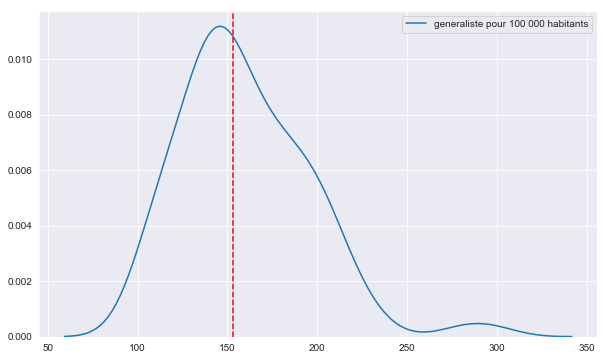

In [6]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_dept['generaliste pour 100 000 habitants'])
plt.axvline(df_dept['generaliste pour 100 000 habitants'].median(), color = 'red', linestyle = '--')
plt.show()

Nous appellerons densité médicale le nombre de médecins pour 100 000 habitants dans un département donné. Il existe une densité médicale pour chaque poste de soins (ambulance, dentiste, chirurgien, radiothérapiste, etc). 

Pour simplifier, nous expliquerons la démarche en parlant uniquement de la densité de généraliste. La méthode reste la même pour les autres postes de soins.

Soit $x_{i}$ un vecteur ordonnant l'ensemble des densités de généralistes pour l'ensemble des départements $i$ (le rôle des poids $w_{i}$ sera présenté plus tard).

$x_{i} = [x_{min},...,x_{median},...,x_{max}] \:, w_{i} = [w_{min},...,w_{median},...,w_{max}]$ 

In [7]:
df_dept['generaliste pour 100 000 habitants'].describe()

count     97.000000
mean     160.172290
std       36.195403
min      103.548581
25%      135.185412
50%      152.977729
75%      182.096106
max      297.415856
Name: generaliste pour 100 000 habitants, dtype: float64

Nous avons donc : $x_{i} = [104,...,153,...,297] \:; w_{i} = [w_{min},...,w_{median},...,w_{max}]$ 

Nous fixons un poids égal à $w_{median} = 1$ pour la densité de généraliste médiane $x_{median}$.
Plus la densité de généraliste diminuera relativement à $x_{median}$, plus le poids $w$ diminuera.
A l'inverse, plus la densité de généraliste augmentera par rapport à $x_{median}$, plus le poids augmentera. 

Pour cela, nous utilisons 2 boucles : la première pour remplir itérativement le vecteur les poids de $w_{median}$ jusqu'à $w_{min}$, la deuxième pour remplir itérativement le vecteur de poids de $w_{median}$ jusqu'à $w_{max}$.

In [8]:
def RelativeWeight(variable) : 
    
    x = np.sort(df_dept[variable].values)

    i = x.tolist().index(np.median(x))
    w = [0] * len(x)
    w[i] = 1

    i = x.tolist().index(np.median(x))
    while i >= 1 : 
        w[i-1] = (w[i]*x[i-1])/x[i]
        i = i - 1

    j = x.tolist().index(np.median(x))
    while j <= len(w)-1 : 
        try :
            w[j+1] = (w[j]*x[j+1])/x[j]
        except : IndexError
        pass
        j = j + 1

    d = pd.DataFrame(data = w, index = x, columns = ['Poids'])
        
    return d

df_dept['poids_generaliste'] = df_dept['generaliste pour 100 000 habitants'].map(
    RelativeWeight(variable = 'generaliste pour 100 000 habitants')["Poids"])

df_dept['poids_ambulance'] = df_dept['ambulance pour 100 000 habitants'].map(
    RelativeWeight(variable = 'ambulance pour 100 000 habitants')["Poids"])

df_dept['poids_chirurgien'] = df_dept['chirurgien pour 100 000 habitants'].map(
    RelativeWeight(variable = 'chirurgien pour 100 000 habitants')["Poids"])

df_dept['poids_dentiste'] = df_dept['dentiste pour 100 000 habitants'].map(
    RelativeWeight(variable = 'dentiste pour 100 000 habitants')["Poids"])

df_dept['poids_hopital'] = df_dept['hopital pour 100 000 habitants'].map(
    RelativeWeight(variable = 'hopital pour 100 000 habitants')["Poids"])

df_dept['poids_infirmiers'] = df_dept['infirmiers pour 100 000 habitants'].map(
    RelativeWeight(variable = 'infirmiers pour 100 000 habitants')["Poids"])

df_dept['poids_réeductateur_podologue'] = df_dept['réeducateur podologue pour 100 000 habitants'].map(
    RelativeWeight(variable = 'réeducateur podologue pour 100 000 habitants')["Poids"])

df_dept['poids_radiologiste'] = df_dept['radiologiste pour 100 000 habitants'].map(
    RelativeWeight(variable = 'radiologiste pour 100 000 habitants')["Poids"])

df_dept['poids_analyse_médicale'] = df_dept['analyse médicale pour 100 000 habitants'].map(
    RelativeWeight(variable = 'analyse médicale pour 100 000 habitants')["Poids"])

df_dept['poids_autre'] = df_dept['autre pour 100 000 habitants'].map(
    RelativeWeight(variable = 'autre pour 100 000 habitants')["Poids"])

df_dept['poids_autre_spécialiste'] = df_dept['autre spécialiste pour 100 000 habitants'].map(
    RelativeWeight(variable = 'autre spécialiste pour 100 000 habitants')["Poids"])

df_dept['poids_organe'] = df_dept['organe pour 100 000 habitants'].map(
    RelativeWeight(variable = 'organe pour 100 000 habitants')["Poids"].dropna())

Maintenant que les poids sont calculés, nous pouvons "ajuster" les densités, pour chaque département $i$, pour chaque poste de soins $j$.

\begin{equation}
x_{ij}^{adj} = w_{ij} \: x_{ij}
\end{equation}

In [9]:
df_dept['ambulance_ajusté'] = df_dept['poids_ambulance'] * df_dept['ambulance pour 100 000 habitants']

df_dept['réeducateur_podologue_ajusté'] = df_dept['poids_réeductateur_podologue'] * df_dept['réeducateur podologue pour 100 000 habitants']

df_dept['analyse_médicale_ajusté'] = df_dept['poids_analyse_médicale'] * df_dept['analyse médicale pour 100 000 habitants']

df_dept['autre_ajusté'] = df_dept['poids_autre'] * df_dept['autre pour 100 000 habitants']

df_dept['autre_spécialiste_ajusté'] = df_dept['poids_autre_spécialiste'] * df_dept['autre spécialiste pour 100 000 habitants']

df_dept['chirurgien_ajusté'] = df_dept['poids_chirurgien'] * df_dept['chirurgien pour 100 000 habitants']

df_dept['dentiste_ajusté'] = df_dept['poids_dentiste'] * df_dept['dentiste pour 100 000 habitants']

df_dept['generaliste_ajusté'] = df_dept['poids_generaliste'] * df_dept['generaliste pour 100 000 habitants']

df_dept['hopital_ajusté'] = df_dept['poids_hopital'] * df_dept['hopital pour 100 000 habitants']

df_dept['infirmier_ajusté'] = df_dept['poids_infirmiers'] * df_dept['infirmiers pour 100 000 habitants']

df_dept['organe_ajusté'] = df_dept['poids_organe'] * df_dept['organe pour 100 000 habitants']

df_dept['radiologiste_ajusté'] = df_dept['poids_radiologiste'] * df_dept['radiologiste pour 100 000 habitants']

Nous avons ensuite décidé de sommer en colonne l'ensemble de ces nouvelles densités ajustées, de manière à obtenir comme une densité médicale globale ajustée, noté $y_{i}$

\begin{equation}
\displaystyle y_{i} = \sum_{j=1}^{m} x_{ij}^{adj} \\
\end{equation}

In [10]:
f = []
for v in df_dept.columns : 
    if v.endswith('ajusté') : 
        f.append(v)
d = df_dept[f]
d['somme'] = d.sum(axis=1)

Enfin, nous appliquons une transformation min-max sur cette nouvelle variable, me permettant d'obtenir un score de densité médicale compris entre 0 et 1.

\begin{equation}
\displaystyle score_{i} = \frac{y_{i} - y_{min}}{y_{max} - y_{min}}
\end{equation}

In [11]:
x = d['somme'].values.reshape(-1,1) 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
d['score'] = x_scaled

Visualisons la distribution de ce score (tend vers 1 si la densité médicale est relativement forte, et vers 0 si la densité médicale est relativement faible).

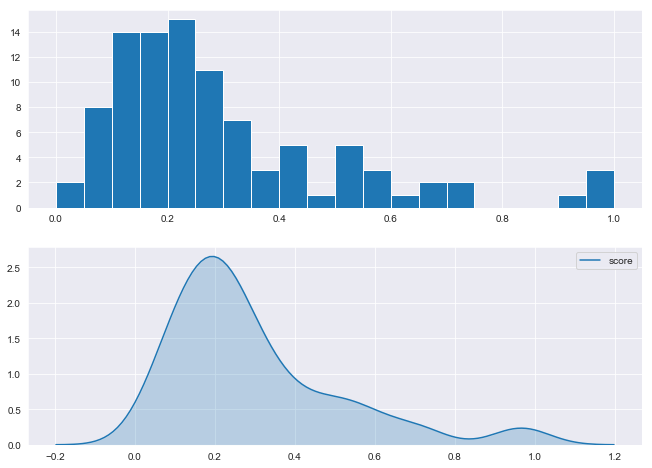

In [12]:
plt.figure(figsize=(11,8))
plt.subplot(2, 1, 1)
plt.hist(d['score'], bins = 20)
plt.subplot(2, 1, 2)
sns.kdeplot(d['score'], shade = True)
plt.show()

# Tableau de bord

In [13]:
df_dept = df_dept.rename(columns = {'ambulance pour 100 000 habitants' : 'Ambulance',
                                    'analyse médicale pour 100 000 habitants' : 'Analyse médicale',
                                    'autre pour 100 000 habitants' : 'Autre',
                                    'autre spécialiste pour 100 000 habitants' : 'Autre spécialiste',
                                    'chirurgien pour 100 000 habitants' : 'Chirurgien',
                                    'dentiste pour 100 000 habitants' : 'Dentiste',
                                    'generaliste pour 100 000 habitants' : 'Généraliste',
                                    'hopital pour 100 000 habitants' : 'Hôpital',
                                    'infirmiers pour 100 000 habitants' : 'Infirmiers',
                                    'organe pour 100 000 habitants' : 'Organe',
                                    'radiologiste pour 100 000 habitants' : 'Radiologiste',
                                    'réeducateur podologue pour 100 000 habitants' : 'Réeducateur podologue'})

df_dept['Département'] = df_dept.index.values
df_dept['Score'] = x_scaled

a = widgets.ToggleButtons(
                          options = ['Ambulance',
                                     'Analyse médicale',
                                     'Autre',
                                     'Autre spécialiste',
                                     'Chirurgien',
                                     'Dentiste',
                                     'Généraliste',
                                     'Hôpital',
                                     'Infirmiers',
                                     'Organe',
                                     'Radiologiste',
                                     'Réeducateur podologue'],
                          description = 'Spécialité :',
                          disabled = False,
                          button_style = ''
                         )
b = widgets.Select(
                   options = df_dept['Département'].values.tolist(),
                   value = '01',
                   description = 'Département :',
                   disabled = False
                  )

display(a,b)  

button = widgets.Button(description= "Voir les résultats")
display(button)

output = widgets.Output()

@output.capture()
def on_button_clicked(z):
    
    print('Dans le département n°', b.value,', la densité en', a.value.lower(),
    'est de', int(np.round(df_dept.loc[df_dept['Département'] == b.value, a.value].item(),0)),
    'pour 100 000 habitants. \nLe score de densité médicale de ce département est égal à',
    np.round(df_dept.loc[df_dept['Département'] == b.value, "Score"].item(),2))
    
button.on_click(on_button_clicked)
display(output)

ToggleButtons(description='Spécialité :', options=('Ambulance', 'Analyse médicale', 'Autre', 'Autre spécialist…

Select(description='Département :', options=('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',…

Button(description='Voir les résultats', style=ButtonStyle())

Output()